# Cleaning Portuguese Bank Marketing Data

< Intro >

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os
from matplotlib.dates import date2num
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
os.chdir('C:\\Users\\james\\Portuguese Bank Marketing Data')
import warnings
warnings.filterwarnings('ignore')


In [2]:
BankData = pd.read_csv("bank-additional-full.csv", sep=';')
BankPreCleaned = pd.read_csv("bank-additional.csv",sep=';')

## Description of Columns
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  
21 - y - has the client subscribed a term deposit? (binary: "yes","no")   


In [3]:
BankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(BankData['y'].value_counts() / len(BankData['y']) * 100)
#BankData.groupby('default')['y'].mean()

no     88.734583
yes    11.265417
Name: y, dtype: float64


In [5]:
for column in BankData:
    if (len(BankData[BankData[column] == 'unknown']) / len(BankData[column]) * 100) > 0:
        print("Completeness of: "+column)
        print(100 - len(BankData[BankData[column] == 'unknown']) / len(BankData[column]) * 100)

Completeness of: job
99.19879576575701
Completeness of: marital
99.80576867048654
Completeness of: education
95.79731960765271
Completeness of: default
79.12741575216083
Completeness of: housing
97.59638729727105
Completeness of: loan
97.59638729727105


In [6]:
for column in BankData:
    if BankData[column].dtype == 'O':
        print(column)
        print(BankData[column].value_counts() / len(BankData[column]) * 100)

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64
education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64
default
no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64
housing
yes        52.384190
no         45.212198
unknown     2.403613
Name: housing, dtype: float64
loan
no     

From this we can see we can drop some of our unknowns (job, mairtal, education, housing, loan) as they don't statistaically make a huge impact. Default is more of a sensitive area, 20% of your data on customer's default status is unknown. We can see that someone who marked  'yes' to default did not take the loan, however this 100% rate has a very small sample size - 3. Ultimately we could say if someone is in default they won't take a loan and this could be a strong indicator. I've chosen to keep this column and the subsequent 'unknown' data and test the difference of our ML techniques with and without using it.

In [7]:
BankDataCleaned = BankData
len(BankData)

41188

In [8]:
# Removing Rows which don't meet our statical importance
columns = ['job','marital','education','housing','loan']
for column in columns:
    BankDataCleaned = BankDataCleaned[BankDataCleaned[column] != 'unknown']

In [9]:
"""Cleaning Data Equations"""
columns = ['job','marital','education','housing','loan']
for column in columns:
    BankDataCleaned = BankDataCleaned[BankDataCleaned[column] != 'unknown']
    
# Remove any calls under 30 Seconds
BankDataCleaned = BankDataCleaned[BankDataCleaned['duration'] > 30]

# Remove any customers in default
BankDataCleaned = BankDataCleaned[BankDataCleaned['default'] != 'yes']

# Map Days and Months
BankDataCleaned['day_of_week'] = BankDataCleaned['day_of_week'].map({'mon': 1, 'tue': 2,'wed': 3, 'thu': 4, 'fri':5})
BankDataCleaned['month'] = BankDataCleaned['month'].map({'mar': 3, 'apr': 4, 'may':5,'jun': 6, 'jul': 7,'aug': 8, 'sep': 9, 'oct':10,'nov':11,'dec':12})

# Removing a few more outliers in the 
BankDataCleaned = BankDataCleaned[BankDataCleaned['duration'] < BankDataCleaned['duration'].quantile(0.99)]

# Encodeding Data

As our ML requires numerical values and not strings we will encode all the data.

In [16]:
objFeatures = BankDataCleaned.select_dtypes(include="object").columns
le = preprocessing.LabelEncoder()
BankDataEncoded = BankDataCleaned
for feat in objFeatures:
    BankDataEncoded[feat] = le.fit_transform(BankDataEncoded[feat].astype(str))

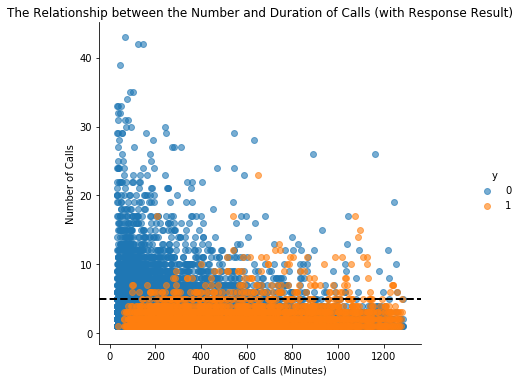

In [17]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = BankDataCleaned,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =5)
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')

'''# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
'''
plt.show()

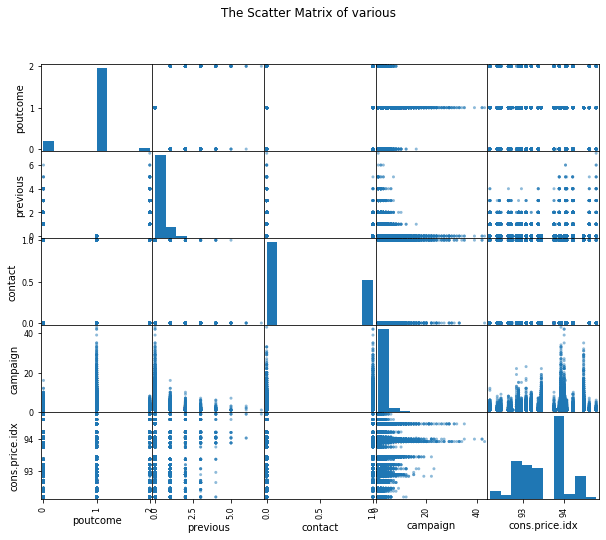

In [18]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(BankDataEncoded[['poutcome','previous','contact','campaign','cons.price.idx']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of various ')
plt.show()

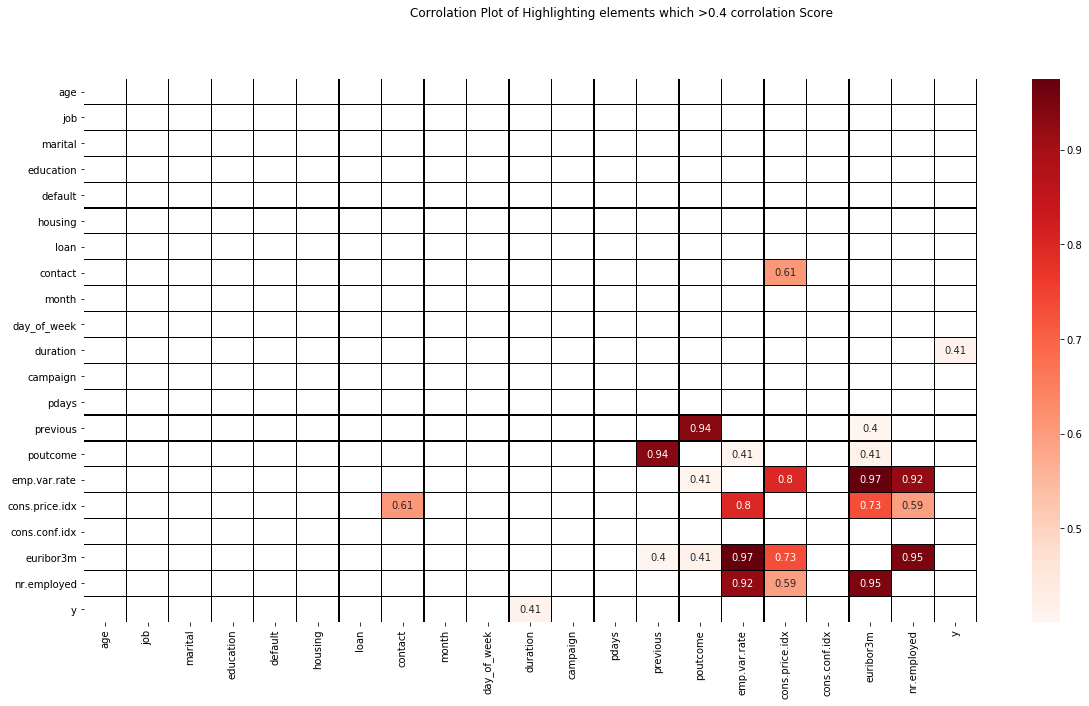

In [19]:
BankCorr = BankDataEncoded[BankDataEncoded['pdays'] == 999].corr()
FilteredBankCorr = BankCorr[((BankCorr >= .4) | (BankCorr <= -.4)) & (BankCorr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(FilteredBankCorr.abs(), annot=True, cmap="Reds", linewidths=0.2, linecolor='black')
plt.suptitle('Corrolation Plot of Highlighting elements which >0.4 corrolation Score ')

plt.show()

In [20]:
#nremployee_pct = pd.crosstab(BankData['nr.employed'].max(,BankData['month'])
#nremployee_pct = nremployee_pct.transpose()
nremployee_pct2 = BankData[{'month','nr.employed'}]
nremp = nremployee_pct2.groupby('month').mean()
nremp['Month'] = [4,8,12,7,6,3,5,11,10,9]
nremp = nremp.sort_values('Month',ascending = True)
month['nremp'] = nremp['nr.employed']

In [21]:
count_month_response_pct = pd.crosstab(BankData['y'],BankData['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(BankData['month'].value_counts())

month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)
month['% of Annual Employee Maximum'] = nremployee_pct2['nr.employed'] / BankData['nr.employed'].max()


In [25]:
#nremployee_pct = pd.crosstab(BankData['nr.employed'].max(,BankData['month'])
#nremployee_pct = nremployee_pct.transpose()
nremployee_pct2 = BankData[{'month','nr.employed'}]
nremp = nremployee_pct2.groupby('month').mean()
nremp['Month'] = [4,8,12,7,6,3,5,11,10,9]
nremp = nremp.sort_values('Month',ascending = True)
month['nremp'] = nremp['nr.employed']
month['% nr'] = (month['nremp'] / BankData['nr.employed'].max())
month['% nr'] = month['% nr'] / month['% nr'].max()
month['% nr_rank'] = month['% nr'].rank()

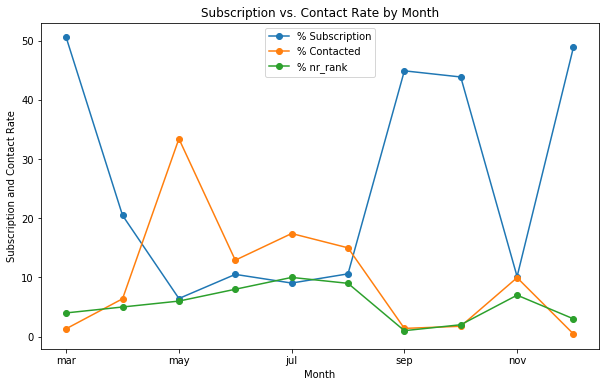

In [26]:
plot_month = month[['% Subscription','% Contacted','% nr_rank']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
#plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

y = month['% nr_rank'].max()
x = month['% nr_rank'].idxmax()

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
#plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

# ML Performance

In [23]:
BankDataEncoded.iloc[:,0:-1]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,5,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,5,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,5,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,5,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,5,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,11,5,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,11,5,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,1,0,0,11,5,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,11,5,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [24]:
#assumes last column is target column.
def DataSplit(df,size=0.2,state=42):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1], test_size=size,random_state=state)
    return X_train, X_test, y_train, y_test


In [25]:
X_train, X_test, y_train, y_test = DataSplit(BankDataEncoded)

In [26]:
'''sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

'sc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [27]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [28]:
print(classification_report(y_test,pred_rfc))

print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6429
           1       0.67      0.51      0.58       824

    accuracy                           0.92      7253
   macro avg       0.80      0.74      0.77      7253
weighted avg       0.91      0.92      0.91      7253

[[6220  209]
 [ 405  419]]


In [29]:
rfc_importance=rfc.feature_importances_
indices = np.argsort(rfc_importance)[::-1]
for f in range(BankDataEncoded.iloc[:,0:-1].shape[1]):
    print("%d. feature %d (%g)" % (f + 1, indices[f], rfc_importance[indices[f]]*100))

1. feature 10 (30.1187)
2. feature 18 (12.3339)
3. feature 0 (9.40251)
4. feature 19 (5.86502)
5. feature 1 (4.90174)
6. feature 11 (4.40393)
7. feature 9 (4.15283)
8. feature 3 (4.06753)
9. feature 12 (3.34025)
10. feature 17 (3.06327)
11. feature 14 (2.8997)
12. feature 2 (2.39003)
13. feature 15 (2.36163)
14. feature 16 (2.31305)
15. feature 5 (1.98125)
16. feature 8 (1.93648)
17. feature 13 (1.30378)
18. feature 6 (1.29634)
19. feature 7 (0.958865)
20. feature 4 (0.909183)


# SVM Classifier

In [ ]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_clf))

print(confusion_matrix(y_test,pred_clf))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=42)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [11]:
from sklearn.inspection import permutation_importance

ImportError: cannot import name 'permutation_importance' from 'sklearn.inspection' (c:\program files\python37\lib\site-packages\sklearn\inspection\__init__.py)